**TO DO**
- Colocar SVM
- Colocar Matriz de Confusão Média
- Colocar AUC para todos os casos
- Colocar P value entre todos

In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, balanced_accuracy_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [50]:
df = pd.read_csv("dataset_23_cmc.csv")
df

,Wifes_age,Wifes_education,Husbands_education,Number_of_children_ever_born,Wifes_religion,Wifes_now_working%3F,Husbands_occupation,Standard-of-living_index,Media_exposure,Contraceptive_method_used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0,3
1469,33,4,4,3,1,1,1,4,0,3
1470,39,3,3,8,1,0,1,4,0,3
1471,33,3,3,4,1,0,2,2,0,3


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Wifes_age                     1473 non-null   int64
 1   Wifes_education               1473 non-null   int64
 2   Husbands_education            1473 non-null   int64
 3   Number_of_children_ever_born  1473 non-null   int64
 4   Wifes_religion                1473 non-null   int64
 5   Wifes_now_working%3F          1473 non-null   int64
 6   Husbands_occupation           1473 non-null   int64
 7   Standard-of-living_index      1473 non-null   int64
 8   Media_exposure                1473 non-null   int64
 9   Contraceptive_method_used     1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


In [52]:
target = "Contraceptive_method_used"

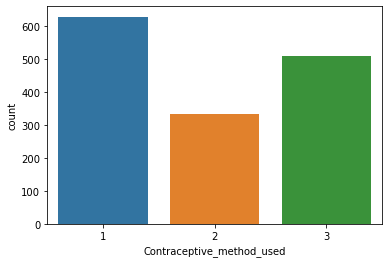

In [53]:
sns.countplot(x = df[target]);


**Balanceamento**

In [54]:
#sample_max = df[df[target] == 2].shape[0]
#df_aux = pd.DataFrame()
#df_aux = pd.concat([df_aux, df.loc[df[(df["Contraceptive_method_used"]==2)].sample(n=sample_max, random_state = 1).index]])
#df_aux = pd.concat([df_aux, df.loc[df[(df["Contraceptive_method_used"]==1)].sample(n=sample_max, random_state = 1).index]])
#df_aux = pd.concat([df_aux, df.loc[df[(df["Contraceptive_method_used"]==3)].sample(n=sample_max, random_state = 1).index]])
#df = df_aux

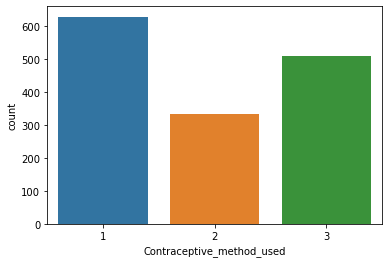

In [55]:
sns.countplot(x = df[target]);

In [56]:
#normalized_df = df

**Normalização entre 0 - 1**

In [57]:
#normlizando 0 - 1
normalized_df = pd.DataFrame()
for i in df.columns:
    if i != target:
        normalized_df[i]=(df[i]-df[i].min())/(df[i].max()-df[i].min())
    else:
        normalized_df[i] = df[i]
        
normalized_df

,Wifes_age,Wifes_education,Husbands_education,Number_of_children_ever_born,Wifes_religion,Wifes_now_working%3F,Husbands_occupation,Standard-of-living_index,Media_exposure,Contraceptive_method_used
0,0.242424,0.333333,0.666667,0.1875,1.0,1.0,0.333333,0.666667,0.0,1
1,0.878788,0.000000,0.666667,0.6250,1.0,1.0,0.666667,1.000000,0.0,1
2,0.818182,0.333333,0.666667,0.4375,1.0,1.0,0.666667,1.000000,0.0,1
3,0.787879,0.666667,0.333333,0.5625,1.0,1.0,0.666667,0.666667,0.0,1
4,0.606061,0.666667,0.666667,0.5000,1.0,1.0,0.666667,0.333333,0.0,1
...,...,...,...,...,...,...,...,...,...,...
1468,0.515152,1.000000,1.000000,0.1250,1.0,0.0,0.333333,1.000000,0.0,3
1469,0.515152,1.000000,1.000000,0.1875,1.0,1.0,0.000000,1.000000,0.0,3
1470,0.696970,0.666667,0.666667,0.5000,1.0,0.0,0.000000,1.000000,0.0,3
1471,0.515152,0.666667,0.666667,0.2500,1.0,0.0,0.333333,0.333333,0.0,3


**EXPERIMENTO**

In [58]:
def classificador(model,X_train, X_test,y_train, y_test):
    
    model.fit(X_train, y_train)
    #utilizando acuracia balanceada
    new_row = {"ACC":balanced_accuracy_score(y_test, model.predict(X_test)),"F1":f1_score(y_test, model.predict(X_test), average='weighted') }
    matrix_confusao = confusion_matrix(y_test,model.predict(X_test))



    return (new_row, matrix_confusao)

#Mudar para plotar a matriz de confusão média
def plotMatrizConfusao(matriz_list):
    sum = [[0,0,0],[0,0,0],[0,0,0]]
    for i in range(len(matriz_list)):
        sum = sum + matriz_list[i]
        
            
    sns.heatmap(sum/len(matriz_list), annot=True)
    

In [59]:
def otimizadorDeHype(name,X_train,y_train):
    cv = 3
    if name=='knn':
        limite_superior = 100
        limite_inferior = 1 
        limite = list(range(limite_inferior,limite_superior))
        #Parametros a serem escolhidos
        params = {'n_neighbors':limite, 'metric':['euclidean','manhattan']}
        #istanciando 
        gridS = GridSearchCV(KNeighborsClassifier(),params,cv=cv,n_jobs=-1,scoring='accuracy')
        #treinando o grid 
        grid_result = gridS.fit(X_train,y_train)
        return KNeighborsClassifier(metric = grid_result.best_params_['metric'],
                                    n_neighbors = grid_result.best_params_['n_neighbors']  )
    
    if name== 'mlp':
        mlp = MLPClassifier(max_iter=1000)

        params = {
            'hidden_layer_sizes': [(8,8),(316,16),(32,32), (32,64), (64,128)],
            'activation': ['tanh', 'relu'],
            'solver':['sgd','adam'],
            'alpha':[0.0001, 0.05],
            'learning_rate': ['constante','adaptive'],
        }

        gridS = GridSearchCV(mlp,params,n_jobs=-1,cv=cv,scoring='accuracy')
        
        grid_result = gridS.fit(X_train,y_train)
        return MLPClassifier(hidden_layer_sizes=grid_result.best_params_['hidden_layer_sizes'], 
                    activation=grid_result.best_params_['activation'], solver=grid_result.best_params_['solver'],
                    alpha=grid_result.best_params_['alpha'],
                    learning_rate=grid_result.best_params_['learning_rate'], max_iter=100000)
    if name == 'df':
        
        df = DecisionTreeClassifier()
        params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': list(range(2, 10)),
                  'max_depth':list(range(2, 15)),'criterion':["gini", "entropy"]}
        
        gridS = GridSearchCV(df,params,cv=cv,n_jobs=-1,scoring='accuracy')
        
        grid_result = gridS.fit(X_train,y_train)
        return DecisionTreeClassifier(max_leaf_nodes = grid_result.best_params_['max_leaf_nodes'],
                                      min_samples_split=grid_result.best_params_['min_samples_split'] ,
                                     max_depth=  grid_result.best_params_['max_depth'],
                                     criterion = grid_result.best_params_['criterion'])
    if name == "nb":
        
        nb = GaussianNB()
        
        params = {'var_smoothing': np.logspace(0,-9, num=100)}
        
        gridS = GridSearchCV(nb,params,cv=cv,n_jobs=-1,scoring='accuracy')
        
        grid_result = gridS.fit(X_train,y_train)
        return GaussianNB(var_smoothing=grid_result.best_params_['var_smoothing'])
    
    if name == "reg":
        
        reg = LogisticRegression(solver='liblinear')
        
        params = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
        
        gridS = GridSearchCV(reg,params,cv=cv,n_jobs=-1,scoring='accuracy')
        
        grid_result = gridS.fit(X_train,y_train)
        
        return LogisticRegression(solver='liblinear', penalty=grid_result.best_params_['penalty'])
        

In [60]:
X = normalized_df.drop(target, axis=1).values
y = normalized_df[target].values
splits_kfold = 10

In [61]:

kf = StratifiedKFold(n_splits=splits_kfold)
kf.get_n_splits(X,y)

metrics = ["ACC","F1"]


matriz_knn = []
matriz_tree = []
matriz_mlp = []
matriz_nb = []
matriz_reg_log = []

df_knn = pd.DataFrame(columns=metrics)
df_tree = pd.DataFrame(columns=metrics)
df_mlp = pd.DataFrame(columns=metrics)
df_nb = pd.DataFrame(columns=metrics)
df_reg_log = pd.DataFrame(columns=metrics)



for train_index, test_index in kf.split(X,y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

    model = otimizadorDeHype("knn",X_train,y_train)
    line, matrix = classificador(model,X_train, X_test,y_train, y_test)
    df_knn = df_knn.append(line, ignore_index=True)
    matriz_knn.append(matrix)
    
     
        
    model = otimizadorDeHype("df",X_train,y_train)
    line, matrix = classificador(model,X_train, X_test,y_train, y_test)
    df_tree = df_tree.append(line, ignore_index=True)
    matriz_tree.append(matrix)   
    
    
    
    model = otimizadorDeHype("mlp",X_train,y_train)
    line, matrix = classificador(model,X_train, X_test,y_train, y_test)
    df_mlp = df_mlp.append(line, ignore_index=True)
    matriz_mlp.append(matrix)  
    
    
    model = otimizadorDeHype("nb",X_train,y_train)
    line, matrix = classificador(model,X_train, X_test,y_train, y_test)
    df_nb = df_nb.append(line, ignore_index=True)
    matriz_nb.append(matrix) 
    
    
    model = otimizadorDeHype("reg",X_train,y_train)
    line, matrix = classificador(model,X_train, X_test,y_train, y_test)
    df_reg_log = df_reg_log.append(line, ignore_index=True)
    matriz_reg_log.append(matrix)
    
    

To better assess our results, we have used the Kruskal Wallis non-parametric test to determine whether there was a significant
difference in the three groups (MMIGAN, Pix2pix, and Cyclegan). The test was done in all metrics used in this work (MAE,
PSNR, MI, and SSIM). After the Kruskal Wallis test, we performed the Dunn’s test for multiple comparisons between the pairs
of groups to determine which ones differed significantly (p <0.05).

**KNN Resultados**

In [63]:
df_knn

,ACC,F1
0,0.436041,0.453440
1,0.538904,0.549662
2,0.416491,0.435822
3,0.493337,0.520661
4,0.460770,0.478666
5,0.521772,0.492576
6,0.541776,0.553529
7,0.513256,0.548205
8,0.495289,0.509002
9,0.435589,0.442692


In [64]:
df_knn.mean(),df_knn.std()

(ACC    0.485323
 F1     0.498426
 dtype: float64,
 ACC    0.045428
 F1     0.044993
 dtype: float64)

Plot das matrizes de confusão

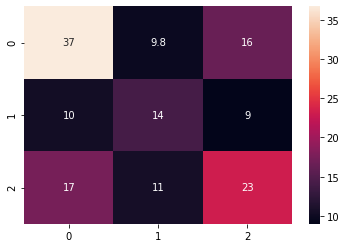

In [65]:
plotMatrizConfusao(matriz_knn)

**DT Resutaldos**

In [66]:
df_tree

,ACC,F1
0,0.532213,0.563948
1,0.495176,0.520816
2,0.491370,0.496519
3,0.514953,0.535989
4,0.542314,0.570012
5,0.523102,0.531075
6,0.573494,0.580182
7,0.489177,0.520657
8,0.539513,0.568382
9,0.560299,0.581488


In [67]:
df_tree.mean(),df_tree.std()

(ACC    0.526161
 F1     0.546907
 dtype: float64,
 ACC    0.028973
 F1     0.029565
 dtype: float64)

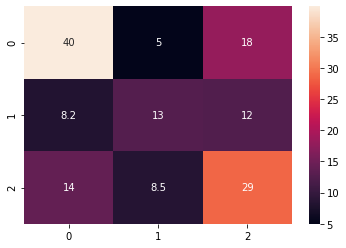

In [68]:
plotMatrizConfusao(matriz_tree)

**Multilayer Perceptron Resultados**

In [69]:
df_mlp

,ACC,F1
0,0.548086,0.571849
1,0.537660,0.547051
2,0.536232,0.560921
3,0.465665,0.497100
4,0.557876,0.585320
5,0.550491,0.561371
6,0.606655,0.622401
7,0.546530,0.577118
8,0.500637,0.525321
9,0.565149,0.560109


In [70]:
df_mlp.mean(),df_mlp.std()

(ACC    0.541498
 F1     0.560856
 dtype: float64,
 ACC    0.037543
 F1     0.033814
 dtype: float64)

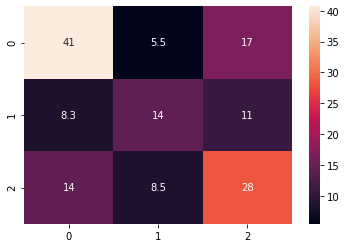

In [71]:
plotMatrizConfusao(matriz_mlp)

**Naive Bayes Resultados**

In [72]:
df_nb

,ACC,F1
0,0.484283,0.494408
1,0.501245,0.458903
2,0.413124,0.392321
3,0.504117,0.495326
4,0.504513,0.465233
5,0.484735,0.445338
6,0.466033,0.473127
7,0.482924,0.510943
8,0.429647,0.421573
9,0.429686,0.433429


In [73]:
df_nb.mean(),df_nb.std()

(ACC    0.470031
 F1     0.459060
 dtype: float64,
 ACC    0.034032
 F1     0.036814
 dtype: float64)

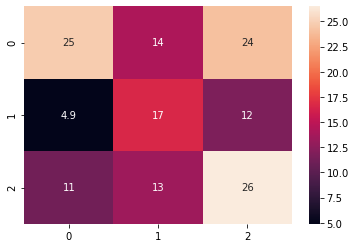

In [74]:
plotMatrizConfusao(matriz_nb)

**Regressão Logistica Resutaldos**

In [75]:
df_reg_log

,ACC,F1
0,0.481948,0.497298
1,0.488951,0.510663
2,0.464591,0.489261
3,0.446708,0.478108
4,0.513539,0.537841
5,0.448943,0.467963
6,0.519424,0.542478
7,0.444982,0.477637
8,0.421611,0.447497
9,0.500527,0.525583


In [76]:
df_reg_log.mean(),df_reg_log.std()

(ACC    0.473122
 F1     0.497433
 dtype: float64,
 ACC    0.032757
 F1     0.031311
 dtype: float64)

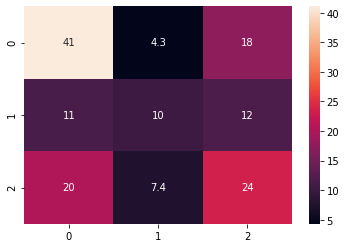

In [77]:
plotMatrizConfusao(matriz_reg_log)

**Teste Estátistico**

In [80]:
print("Valores de p para acuracia ")
print(stats.kruskal(df_knn["ACC"], df_nb["ACC"],df_mlp["ACC"],df_tree["ACC"],df_reg_log["ACC"]))

Valores de p para acuracia 
KruskalResult(statistic=21.2527058823529, pvalue=0.0002821480529208631)


In [81]:
print("Valores de p para F1 ")
print(stats.kruskal(df_knn["F1"], df_nb["F1"],df_mlp["F1"],df_tree["F1"],df_reg_log["F1"]))

Valores de p para F1 
KruskalResult(statistic=27.276235294117612, pvalue=1.7479378857908905e-05)
